In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Membaca dataset
data_nilai = pd.read_csv('Sample Nilai Alumni Prodi Informatika_Ver1.csv')
data_profesi = pd.read_csv('Sample Profesi Pekerjaan Alumni Prodi Informatika Universitas Gunadarma_Ver1.csv')

In [34]:
data_nilai.head(10)

,NPM,KDMK,NAMA MK,JENIS,SKS,NILAI
0,50414234,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
1,50414279,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
2,50414496,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
3,50414623,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
4,50414925,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
5,50415185,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
6,50415335,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
7,50415370,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,C
8,50415582,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
9,50415780,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B


In [35]:
data_profesi.head(10)

,NPM,Nama Lengkap,IPK,Klasifikasi Profesi
0,50414234,ADI NUGRAHA YUNANDA,3.30,Software Engineer
1,50414279,ADITIA SEPTIANDI,3.10,Data Engineer
2,50414496,AGUS ANIN FALAHUDIN,3.25,Data Analyst
3,50414623,AHMAD ZULFIKAR,3.38,Software Engineer
4,50414925,ALZA ICHSAN KURNIAWAN,3.72,Mobile App Developer
5,51414049,ANDI MUHADIR AMIN,3.19,Mobile App Developer
6,51414092,ANDINITA NURUL HIDAYAH,3.57,Software Quality Engineer
7,51414196,ANGGA ELVIN PRATAMA,3.31,Data Engineer
8,51414598,ARIF RACHMAN,3.32,Graphic Designer
9,51414845,AUNI RACHMAN,3.20,Software Quality Assurance


In [36]:
# Remove the columns 'KDMK' and 'JENIS' from the 'nilai_alumni' dataset
nilai_alumni_cleaned = data_nilai.drop(columns=['KDMK', 'JENIS'])

# Remove the column 'Nama Lengkap' from the 'data_profesi' dataset
data_profesi_cleaned = data_profesi.drop(columns=['Nama Lengkap'])

In [37]:
# Merge the two datasets based on 'NPM' and perform one-hot encoding on the 'NAMA MK' (subject names) column
merged_data = pd.merge(data_profesi_cleaned, nilai_alumni_cleaned, on='NPM')

In [38]:
merged_data.head(10)

,NPM,IPK,Klasifikasi Profesi,NAMA MK,SKS,NILAI
0,50414234,3.3,Software Engineer,ALGORITMA DAN PEMROGRAMAN 1,2,A
1,50414234,3.3,Software Engineer,ALGORITMA DAN PEMROGRAMAN 2,2,B
2,50414234,3.3,Software Engineer,ALGORITMA DAN PEMROGRAMAN 3,2,A
3,50414234,3.3,Software Engineer,ALGORITMA DAN PENGOLAHAN PARALEL,3,B
4,50414234,3.3,Software Engineer,ALGORITMA DEEP LEARNING,2,A
5,50414234,3.3,Software Engineer,ARSITEKTUR KOMPUTER,2,A
6,50414234,3.3,Software Engineer,BAHASA INDONESIA,2,A
7,50414234,3.3,Software Engineer,BAHASA INGGRIS 1,1,B
8,50414234,3.3,Software Engineer,BAHASA INGGRIS 2,1,B
9,50414234,3.3,Software Engineer,BAHASA INGGRIS BISNIS 1,1,A


In [39]:
# To see the count of each grade
grade_counts = merged_data['NILAI'].value_counts()
grade_counts


NILAI
A    8278
B    6297
C     793
D      52
Name: count, dtype: int64

In [40]:
# Change the data type of the 'NAMA MK' column to INDEX
merged_data['INDEX'] = merged_data['NAMA MK']

In [41]:

# Pivots the merged data table to create a table with the student's NPM, IPK, Klasifikasi Profesi as rows, and the subject indices as columns, with the student's grades as the values.

# The `pivot_table` function is used to reshape the data from a long format to a wide format, with the subject indices as the column names and the grades as the values. The `first` aggregation function is used to handle any duplicate grades for a student in a subject.

# The resulting `pivoted_grades` DataFrame will have the student information (NPM, IPK, Klasifikasi Profesi) as the index, and the subject grades as the columns, with 0 filled in for any subjects not taken by a student.


pivoted_grades = merged_data.pivot_table(
    index=['NPM', 'IPK', 'Klasifikasi Profesi'], 
    columns='INDEX', 
    values='NILAI', 
    aggfunc='first'  # Take the first occurrence if there are duplicates
).reset_index()

# Merge the pivoted table back to the original data to align with the rest of the information
# This will leave 0 for subjects not taken by each student

pivoted_grades.fillna(0, inplace=True)

pivoted_grades.head(10)

INDEX,NPM,IPK,Klasifikasi Profesi,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SISTEM TERDISTRIBUSI,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,50414234,3.30,Software Engineer,A,B,A,B,A,A,A,...,B,A,C,A,C,B,B,0,B,0
1,50414279,3.10,Data Engineer,B,B,B,B,C,B,B,...,A,A,B,B,B,B,A,0,B,0
2,50414496,3.25,Data Analyst,B,B,B,B,A,A,B,...,A,A,A,C,B,A,A,0,B,0
3,50414623,3.38,Software Engineer,A,B,B,B,B,A,B,...,B,B,A,A,B,A,A,0,B,0
4,50414925,3.72,Mobile App Developer,A,B,A,A,A,A,B,...,0,A,A,A,A,A,A,0,B,0
5,50415185,3.29,IT Project Manager,B,B,A,B,A,B,B,...,B,A,A,B,B,B,A,0,B,0
6,50415335,3.36,Network Engineer,B,B,A,B,B,A,B,...,C,A,B,A,B,B,A,0,B,0
7,50415370,3.67,Software Quality Assurance,C,A,A,A,A,A,B,...,0,A,A,B,A,A,A,0,B,0
8,50415582,3.43,Mobile App Developer,B,B,A,B,A,A,B,...,B,B,B,B,A,A,A,0,B,0
9,50415780,3.09,Software Engineer,B,B,B,B,A,B,B,...,B,B,C,A,A,B,A,0,B,0


In [42]:
# Replace NaN values with 0 for the grade columns
pivoted_grades_filled = pivoted_grades.fillna(0)

# Display the updated data with NaN replaced by 0
pivoted_grades_filled.head(10)

INDEX,NPM,IPK,Klasifikasi Profesi,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SISTEM TERDISTRIBUSI,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,50414234,3.30,Software Engineer,A,B,A,B,A,A,A,...,B,A,C,A,C,B,B,0,B,0
1,50414279,3.10,Data Engineer,B,B,B,B,C,B,B,...,A,A,B,B,B,B,A,0,B,0
2,50414496,3.25,Data Analyst,B,B,B,B,A,A,B,...,A,A,A,C,B,A,A,0,B,0
3,50414623,3.38,Software Engineer,A,B,B,B,B,A,B,...,B,B,A,A,B,A,A,0,B,0
4,50414925,3.72,Mobile App Developer,A,B,A,A,A,A,B,...,0,A,A,A,A,A,A,0,B,0
5,50415185,3.29,IT Project Manager,B,B,A,B,A,B,B,...,B,A,A,B,B,B,A,0,B,0
6,50415335,3.36,Network Engineer,B,B,A,B,B,A,B,...,C,A,B,A,B,B,A,0,B,0
7,50415370,3.67,Software Quality Assurance,C,A,A,A,A,A,B,...,0,A,A,B,A,A,A,0,B,0
8,50415582,3.43,Mobile App Developer,B,B,A,B,A,A,B,...,B,B,B,B,A,A,A,0,B,0
9,50415780,3.09,Software Engineer,B,B,B,B,A,B,B,...,B,B,C,A,A,B,A,0,B,0


In [43]:
# Define the grade mapping
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1,}

# Apply the grade mapping to all relevant columns that contain grades
# We'll apply this mapping to all columns except 'NPM', 'IPK', 'Klasifikasi', and 'Profesi'

# Selecting only grade columns
grade_columns = pivoted_grades_filled.columns.difference(['NPM', 'IPK', 'Klasifikasi', 'Profesi'])

# Apply grade mapping to these columns
pivoted_grades_filled[grade_columns] = pivoted_grades_filled[grade_columns].replace(grade_mapping)


# Display the updated dataframe
pivoted_grades_filled.head(10)

INDEX,NPM,IPK,Klasifikasi Profesi,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SISTEM TERDISTRIBUSI,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,50414234,3.30,Software Engineer,4,3,4,3,4,4,4,...,3,4,2,4,2,3,3,0,3,0
1,50414279,3.10,Data Engineer,3,3,3,3,2,3,3,...,4,4,3,3,3,3,4,0,3,0
2,50414496,3.25,Data Analyst,3,3,3,3,4,4,3,...,4,4,4,2,3,4,4,0,3,0
3,50414623,3.38,Software Engineer,4,3,3,3,3,4,3,...,3,3,4,4,3,4,4,0,3,0
4,50414925,3.72,Mobile App Developer,4,3,4,4,4,4,3,...,0,4,4,4,4,4,4,0,3,0
5,50415185,3.29,IT Project Manager,3,3,4,3,4,3,3,...,3,4,4,3,3,3,4,0,3,0
6,50415335,3.36,Network Engineer,3,3,4,3,3,4,3,...,2,4,3,4,3,3,4,0,3,0
7,50415370,3.67,Software Quality Assurance,2,4,4,4,4,4,3,...,0,4,4,3,4,4,4,0,3,0
8,50415582,3.43,Mobile App Developer,3,3,4,3,4,4,3,...,3,3,3,3,4,4,4,0,3,0
9,50415780,3.09,Software Engineer,3,3,3,3,4,3,3,...,3,3,2,4,4,3,4,0,3,0


In [44]:
# Get a random NPM from the data
random_npm = pivoted_grades_filled['NPM'].sample().values[0]

print(f"Randomly selected NPM: {random_npm}")

# Get the data for this random NPM
random_student_data = pivoted_grades_filled[pivoted_grades_filled['NPM'] == random_npm]

# Display the data for the randomly selected student
random_student_data

Randomly selected NPM: 55417547


INDEX,NPM,IPK,Klasifikasi Profesi,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SISTEM TERDISTRIBUSI,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
129,55417547,3.48,Business Analyst,4,4,3,4,3,4,4,...,0,4,3,4,3,3,3,0,3,0


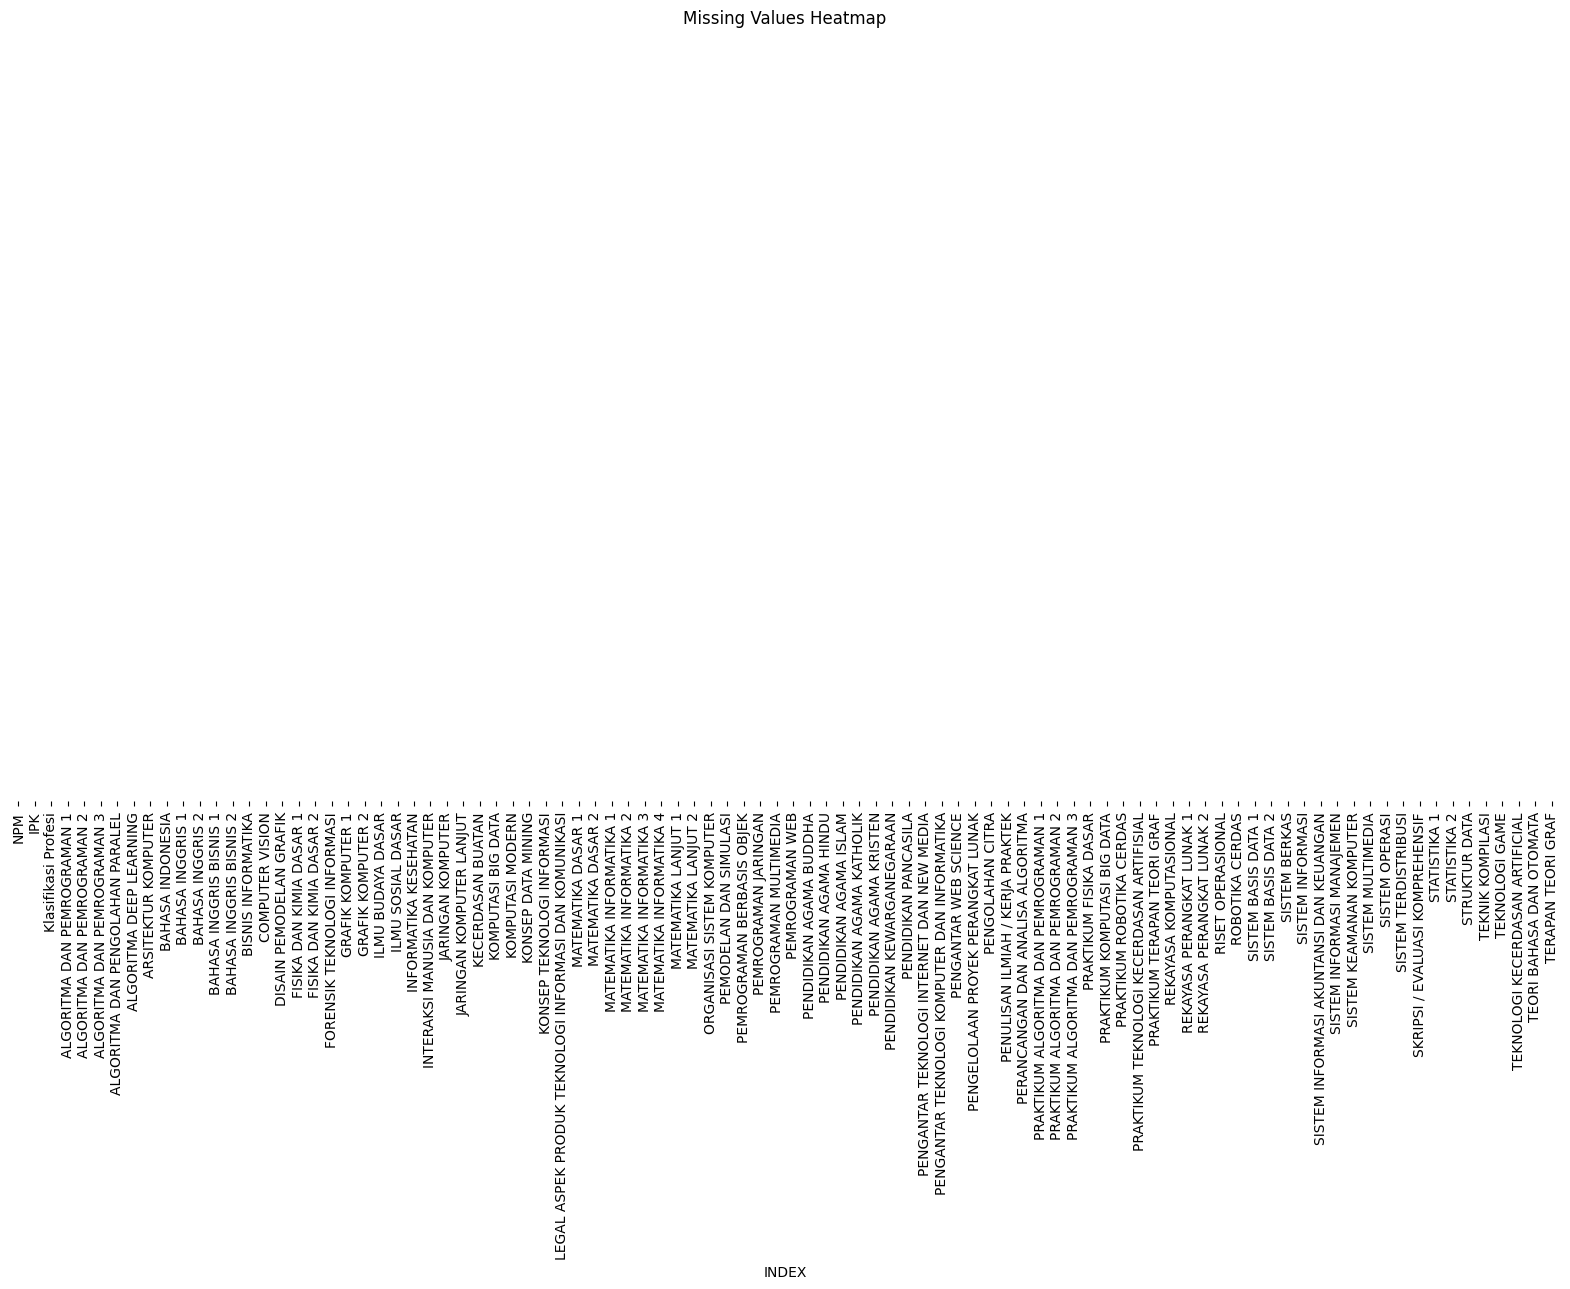

In [45]:
# Create a binary mask where 0 is True and non-zero is False
mask = pivoted_grades_filled.isnull()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Create the heatmap
sns.heatmap(mask, cmap='binary', cbar=False, yticklabels=False)

# Set the title
plt.title('Missing Values Heatmap')

# Show the plot
plt.show()

## Eksplorasi Data

In [46]:
# Step 1: Basic statistics of the numerical columns
basic_stats = pivoted_grades_filled.describe()

# Step 2: Distribution of predicted professions
profession_distribution = pivoted_grades_filled['Klasifikasi Profesi'].value_counts()

basic_stats

INDEX,IPK,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,BAHASA INGGRIS 1,BAHASA INGGRIS 2,...,SISTEM TERDISTRIBUSI,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,3.486582,3.505102,3.352041,3.494898,3.295918,3.693878,3.632653,3.408163,3.346939,3.464286,...,1.581633,3.831633,3.464286,3.352041,3.459184,3.586735,3.688776,0.857143,3.285714,1.142857
std,0.250102,0.540631,0.499791,0.501254,0.549297,0.606092,0.493813,0.578889,0.665672,0.666987,...,1.685068,0.449751,0.635489,0.659095,0.584735,0.552503,0.624357,1.607674,0.572892,1.794579
min,2.820000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,2.000000,0.000000
25%,3.300000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,0.000000,3.000000,0.000000
50%,3.490000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,...,0.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,0.000000,3.000000,0.000000
75%,3.700000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,4.000000,4.000000
max,3.980000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [47]:
profession_distribution

Klasifikasi Profesi
Software Engineer             42
Software Quality Assurance    32
Mobile App Developer          16
Full Stack Developer          15
Data Analyst                  12
Back End Developer            11
Data Engineer                  7
Graphic Designer               6
UI/UX Designer                 5
Web Developer                  5
IT Entrepreneur                5
Front End Developer            5
IT Project Manager             4
Network Engineer               4
Network Administrator          3
Data Scientist                 3
Business Analyst               3
Database Administrator         3
Lecturer                       3
IT Consultant                  3
IT Lecturer                    2
DevOps Engineer                2
Network Security Engineer      1
Cyber Security Manager         1
System Analyst                 1
Software Quality Engineer      1
Cyber Security Analyst         1
Name: count, dtype: int64

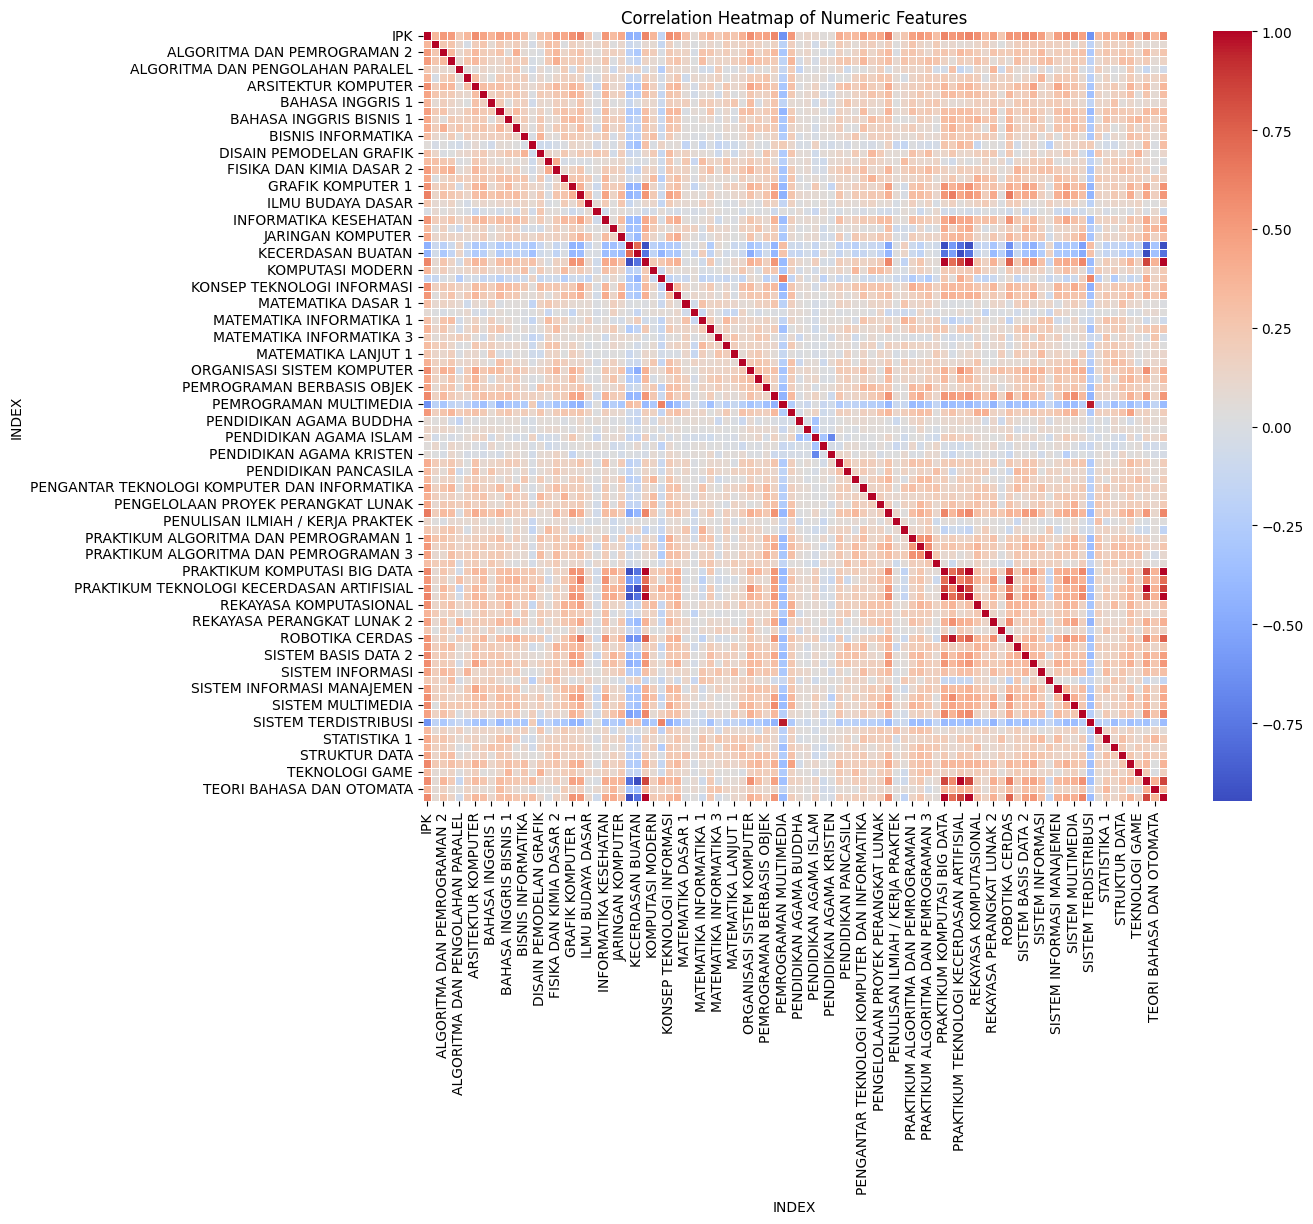

In [48]:
# Select only numeric columns
numeric_columns = pivoted_grades_filled.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix using only numeric columns
correlation_matrix = pivoted_grades_filled[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [49]:
# Let's find the top correlations by unstacking the correlation matrix
top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Filter the top correlations (above 0.8) to find significant relationships
significant_correlations = top_correlations[(top_correlations > 0.8) & (top_correlations < 1.0)]

significant_correlations.head(10)

INDEX                                      INDEX                                    
KOMPUTASI BIG DATA                         TERAPAN TEORI GRAF                           0.998408
PRAKTIKUM KOMPUTASI BIG DATA               KOMPUTASI BIG DATA                           0.997686
TERAPAN TEORI GRAF                         PRAKTIKUM KOMPUTASI BIG DATA                 0.996076
PRAKTIKUM KOMPUTASI BIG DATA               PRAKTIKUM TERAPAN TEORI GRAF                 0.995986
PRAKTIKUM TERAPAN TEORI GRAF               KOMPUTASI BIG DATA                           0.995530
TEKNOLOGI KECERDASAN ARTIFICIAL            PRAKTIKUM TEKNOLOGI KECERDASAN ARTIFISIAL    0.994154
TERAPAN TEORI GRAF                         PRAKTIKUM TERAPAN TEORI GRAF                 0.993900
PRAKTIKUM ROBOTIKA CERDAS                  ROBOTIKA CERDAS                              0.974358
PEMROGRAMAN MULTIMEDIA                     SISTEM TERDISTRIBUSI                         0.961037
PRAKTIKUM TEKNOLOGI KECERDASAN ARTIFISIAL 

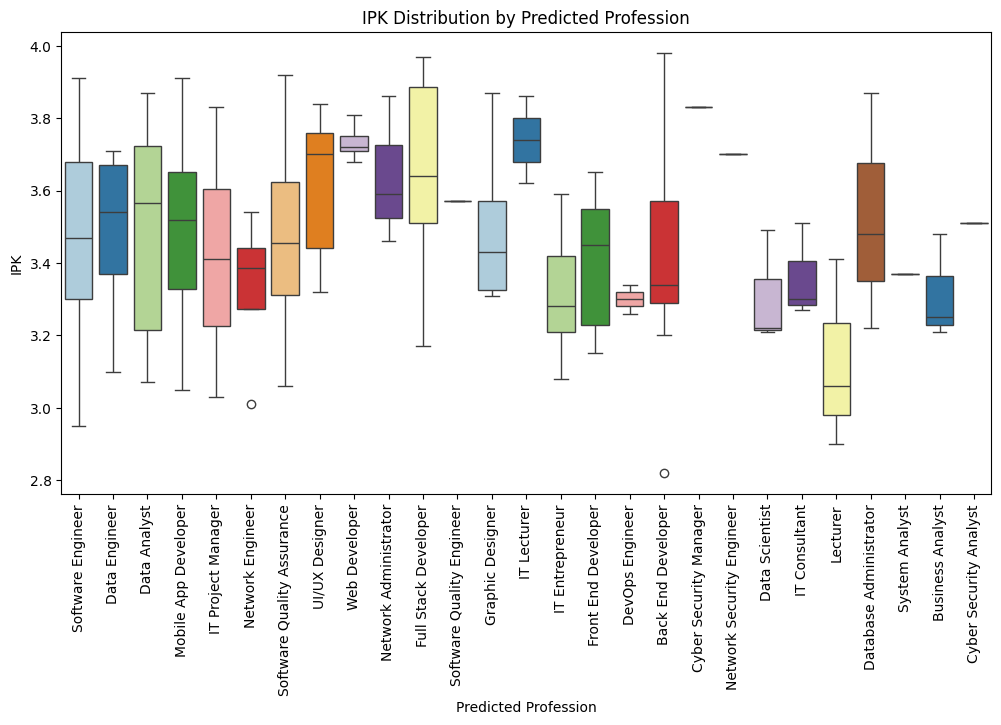

In [50]:
# Create a boxplot to show the distribution of IPK by profession
plt.figure(figsize=(12, 6))
sns.boxplot(x='Klasifikasi Profesi', y='IPK', data=pivoted_grades_filled, palette='Paired')
plt.xticks(rotation=90)
plt.title('IPK Distribution by Predicted Profession')
plt.ylabel('IPK')
plt.xlabel('Predicted Profession')
plt.show()


## Modelling

In [51]:
import tensorflow as tf
from tensorflow.keras import layers

Encode categorical data (like profession) and scale numerical data.

In [52]:
# Example: One-hot encode the profession
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming 'Klasifikasi Profesi' is your target label (profession)
label_encoder = LabelEncoder()
pivoted_grades_filled['Profesi_Encoded'] = label_encoder.fit_transform(pivoted_grades_filled['Klasifikasi Profesi'])

# Select the features for prediction (e.g., IPK and scores)
X = pivoted_grades_filled.drop(['NPM', 'Klasifikasi Profesi', 'Profesi_Encoded'], axis=1)

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to TensorFlow datasets
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices(X_scaled).shuffle(buffer_size=1024).batch(batch_size)

Step 3: 
Define the Generator and Discriminator Models

Generator: Creates synthetic student profiles.

Discriminator: Classifies profiles as real or fake.

In [53]:
# Generator model
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, input_shape=(100,)))  # Input shape will be the noise vector
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())
    
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(X.shape[1]))  # Output shape must match the feature size of X
    return model

# Discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_shape=(X.shape[1],)))  # Input shape matches the feature size of X
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(1))  # Output 1 for Wasserstein Loss
    return model


Step 4: 
Define Loss Functions and Optimizers

In WGAN, we use Wasserstein Loss instead of Binary Cross-Entropy.

In [54]:
# Wasserstein Loss
def wasserstein_loss(y_true, y_pred):
    return tf.reduce_mean(y_true * y_pred)

generator_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00005)
discriminator_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00005)


Step 5: 
Create the Training Loop

Here, we alternate between training the discriminator and the generator.

In [55]:
import os
import time

epochs = 10000
noise_dim = 100
num_examples_to_generate = 16

# Create random seed for generating profiles after training
seed = tf.random.normal([num_examples_to_generate, noise_dim])

# WGAN requires clipping of the discriminator weights
def train_step(real_data):
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as disc_tape, tf.GradientTape() as gen_tape:
        generated_data = generator(noise, training=True)

        real_output = discriminator(real_data, training=True)
        fake_output = discriminator(generated_data, training=True)

        # Discriminator loss
        disc_loss = wasserstein_loss(tf.ones_like(real_output), real_output) + wasserstein_loss(tf.ones_like(fake_output) * -1, fake_output)

        # Generator loss
        gen_loss = wasserstein_loss(tf.ones_like(fake_output), fake_output)

    # Calculate gradients
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)

    # Apply the gradients
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    # Clip discriminator weights (required by WGAN)
    for var in discriminator.trainable_variables:
        var.assign(tf.clip_by_value(var, -0.01, 0.01))

# Training loop
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for real_data in dataset:
            train_step(real_data)

        # Produce images for the GIF as we go
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Time {time.time() - start}')

# Instantiate the models
generator = make_generator_model()
discriminator = make_discriminator_model()

# Train the model
train(train_dataset, epochs)


Epoch 0, Time 0.17441606521606445
Epoch 100, Time 0.1584761142730713
Epoch 200, Time 0.1669151782989502
Epoch 300, Time 0.16950345039367676
Epoch 400, Time 0.1613144874572754
Epoch 500, Time 0.15828418731689453
Epoch 600, Time 0.15410852432250977
Epoch 700, Time 0.1570594310760498
Epoch 800, Time 0.15111064910888672
Epoch 900, Time 0.1757657527923584
Epoch 1000, Time 0.1528010368347168
Epoch 1100, Time 0.14390015602111816
Epoch 1200, Time 0.15309762954711914
Epoch 1300, Time 0.16535043716430664
Epoch 1400, Time 0.15750932693481445
Epoch 1500, Time 0.16928839683532715
Epoch 1600, Time 0.1728191375732422
Epoch 1700, Time 0.15924739837646484
Epoch 1800, Time 0.1739060878753662
Epoch 1900, Time 0.1579732894897461
Epoch 2000, Time 0.16322660446166992
Epoch 2100, Time 0.14926600456237793
Epoch 2200, Time 0.17707395553588867
Epoch 2300, Time 0.18331241607666016
Epoch 2400, Time 0.16812515258789062
Epoch 2500, Time 0.18114757537841797
Epoch 2600, Time 0.22394466400146484
Epoch 2700, Time 0.176

2024-09-15 21:19:17.161434: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 6400, Time 0.1660323143005371
Epoch 6500, Time 0.15680170059204102
Epoch 6600, Time 0.17533612251281738
Epoch 6700, Time 0.16060400009155273
Epoch 6800, Time 0.16757512092590332
Epoch 6900, Time 0.15969443321228027
Epoch 7000, Time 0.15899300575256348
Epoch 7100, Time 0.15909075736999512
Epoch 7200, Time 0.17523646354675293
Epoch 7300, Time 0.15242481231689453
Epoch 7400, Time 0.17284440994262695
Epoch 7500, Time 0.17156553268432617
Epoch 7600, Time 0.16320395469665527
Epoch 7700, Time 0.15707826614379883
Epoch 7800, Time 0.17743611335754395
Epoch 7900, Time 0.17296695709228516
Epoch 8000, Time 0.17412352561950684
Epoch 8100, Time 0.16674041748046875
Epoch 8200, Time 0.16970348358154297
Epoch 8300, Time 0.15857863426208496
Epoch 8400, Time 0.17171478271484375
Epoch 8500, Time 0.18062734603881836
Epoch 8600, Time 0.16435027122497559
Epoch 8700, Time 0.2057335376739502
Epoch 8800, Time 0.1747293472290039
Epoch 8900, Time 0.1705007553100586
Epoch 9000, Time 0.1621396541595459
Epoch 

Step 6: 
Generate Predictions

After training, you can use the generator to create new synthetic student profiles based on the learned distribution.

In [56]:
# Function to generate new student profiles after training
def generate_student_profiles(generator, num_profiles, noise_dim):
    noise = tf.random.normal([num_profiles, noise_dim])
    generated_profiles = generator(noise, training=False)
    return generated_profiles.numpy()

# Example: Generate 10 new student profiles
num_profiles = 10
generated_profiles = generate_student_profiles(generator, num_profiles, noise_dim)

# Print the generated profiles
print("Generated Student Profiles:")
generated_profiles

Generated Student Profiles:


array([[ 4.67973530e-01, -1.63318262e-01, -4.35788274e-01,
        -2.03778744e-02,  1.78174078e-01, -5.14284074e-01,
        -1.61369514e+00,  2.48543948e-01, -2.53777355e-01,
         6.52813494e-01,  7.08204985e-01,  3.76700103e-01,
         1.70337513e-01, -5.82443595e-01,  4.47239965e-01,
         2.90492117e-01,  3.01713049e-01,  1.38888288e+00,
        -5.11867404e-01,  1.77696541e-01,  5.41752160e-01,
         5.71863726e-02,  9.36859176e-02, -2.04617247e-01,
        -5.11019468e-01,  7.16841340e-01,  1.39833558e+00,
        -4.19560760e-01, -3.96599054e-01, -2.21440506e+00,
         3.08716357e-01, -5.21665156e-01,  1.29933167e+00,
        -1.11550474e+00,  9.24051523e-01, -8.32761452e-02,
         9.87913072e-01,  8.18493441e-02, -4.77539152e-01,
         1.46263108e-01, -3.40411663e-01,  2.69970983e-01,
         3.36698651e-01,  9.94463980e-01, -1.24469042e+00,
         1.56863487e+00, -5.96742988e-01, -6.24373555e-01,
         5.65730751e-01,  7.31646538e-01, -3.30019981e-0

In [57]:
# Compute the mean and standard deviation of generated vs. real data
def compute_statistics(real_data, generated_data):
    real_mean, real_std = np.mean(real_data, axis=0), np.std(real_data, axis=0)
    generated_mean, generated_std = np.mean(generated_data, axis=0), np.std(generated_data, axis=0)

    print("Real Data Mean: ", real_mean)
    print("Generated Data Mean: ", generated_mean)
    print("Real Data Std: ", real_std)
    print("Generated Data Std: ", generated_std)

# Evaluate the generated profiles
compute_statistics(X_scaled[:num_profiles], generated_profiles)


Real Data Mean:  [-0.51142551 -0.56578986 -0.50558419  0.21021503 -0.1750675  -0.1552867
  0.13673068 -0.53369886 -0.52252069 -0.54756469  0.20100064 -0.74024876
 -0.10474089 -0.19245009  0.05474307  0.17586311 -0.02109225  0.18375128
 -0.22247302 -0.47996944 -0.17833149  0.12448984 -0.44936839  0.08981551
 -0.30793062  0.68053841  0.38890544 -0.63846951 -0.01616024  0.14951853
 -0.40425004 -0.35650166 -0.39550087  0.11261349  0.31862006 -0.14552138
  0.36841716  0.1735395   0.21938173  0.06898067 -0.00195787 -0.01316616
 -0.28583009 -0.58847991  0.5954112  -0.13344207 -0.12467575 -0.10153462
  0.161119   -0.12364234 -0.26587394 -0.32071349  0.03295694 -0.11700553
 -0.41534663  0.04344207 -0.46056541 -0.44434003  0.33709993 -0.39207842
 -0.80897033 -0.07208946 -0.18099546  0.1380086  -0.63715754 -0.88496313
 -0.53754119 -0.63594971 -0.06826296 -0.52138799 -0.71972833 -0.17218141
 -0.89355933 -0.59707571 -0.62862894  0.12909944 -0.07508943  0.37169629
  0.04850713 -0.37576727 -0.8581963

In [58]:
# Evaluate the discriminator on real and generated data
def evaluate_discriminator(discriminator, real_data, generated_data):
    real_output = discriminator(real_data)
    generated_output = discriminator(generated_data)

    print("Discriminator Output for Real Data: ", real_output.numpy())
    print("Discriminator Output for Generated Data: ", generated_output.numpy())

# Example: Evaluate the discriminator on the first 10 real profiles and generated profiles
evaluate_discriminator(discriminator, X_scaled[:num_profiles], generated_profiles)

Discriminator Output for Real Data:  [[-9.86426882e-03]
 [ 5.83301298e-05]
 [ 5.87809365e-03]
 [ 2.98504205e-03]
 [-1.26110725e-02]
 [ 3.19224829e-03]
 [-1.06168799e-02]
 [-1.04265101e-02]
 [-6.67268271e-03]
 [ 2.77541985e-04]]
Discriminator Output for Generated Data:  [[ 0.00396062]
 [ 0.00241488]
 [ 0.01138834]
 [ 0.00920913]
 [ 0.01403968]
 [ 0.00428468]
 [ 0.00617673]
 [-0.00402259]
 [ 0.00925877]
 [ 0.00803475]]


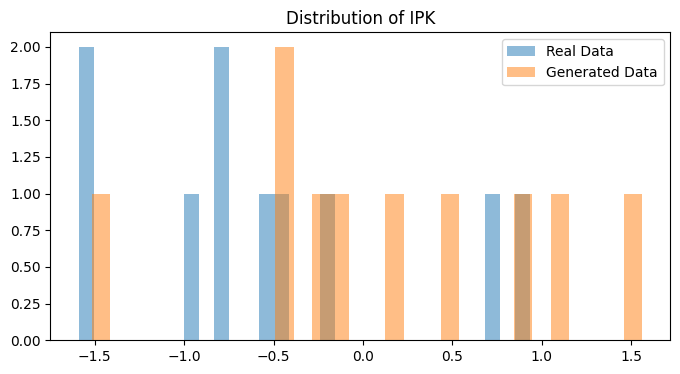

In [59]:
import matplotlib.pyplot as plt

# Function to visualize distributions of a feature (e.g., IPK)
def plot_distribution(real_data, generated_data, feature_idx, feature_name):
    plt.figure(figsize=(8, 4))
    plt.hist(real_data[:, feature_idx], bins=30, alpha=0.5, label='Real Data')
    plt.hist(generated_data[:, feature_idx], bins=30, alpha=0.5, label='Generated Data')
    plt.title(f'Distribution of {feature_name}')
    plt.legend()
    plt.show()

# Visualize the distribution of IPK (assuming it's the first feature)
plot_distribution(X_scaled[:num_profiles], generated_profiles, feature_idx=0, feature_name="IPK")